<a href="https://colab.research.google.com/github/EmodioAI/model-development/blob/main/Audio_GAN_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Conda**

In [ ]:
!conda --version

/bin/bash: conda: command not found


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.12.0-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.12.0-Linux-x86_64.sh -b -f -p /usr/local/

--2023-06-09 00:27:08--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104996770 (100M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’

Miniconda3-py37_4.1 100%[===================>] 100.13M   345MB/s    in 0.3s    

2023-06-09 00:27:09 (345 MB/s) - ‘Miniconda3-py37_4.12.0-Linux-x86_64.sh’ saved [104996770/104996770]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py37h06a4308_2
    - cffi==1.15.0=py37hd667e1

In [ ]:
!which conda
!conda --version

/usr/local/bin/conda
conda 4.12.0


In [ ]:
!conda install --channel defaults conda python=3.5 --yes
!conda update --channel defaults --all --yes

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | 

In [ ]:
import sys
sys.path.append("/usr/local/lib/python3.5/site-packages")

In [ ]:
!conda config --add channels bioconda

!conda config --add channels conda-forge

In [ ]:
!python --version

Python 3.7.16


In [ ]:
!conda install tensorflow==1.8 -y

Solving environment: | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 

# **Load Repository**

In [ ]:
# !git clone https://github.com/maxxies/wavegan-emotion-audio.git
!git clone https://github.com/maxxies/Audio-Synthesis-CycleGAN.git

fatal: destination path 'Audio-Synthesis-CycleGAN' already exists and is not an empty directory.


In [ ]:
import os
os.chdir('Audio-Synthesis-CycleGAN')

# Mount dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Train model

In [ ]:
!python3  train.py

Found 1523 files
0it [00:00, ?it/s]Traceback (most recent call last):
  File "/content/wavegan-emotion-audio/train.py", line 223, in <module>
    wave_gan.train()
  File "/content/wavegan-emotion-audio/train.py", line 145, in train
    disc_cost, disc_wd = self.calculate_discriminator_loss(
  File "/content/wavegan-emotion-audio/train.py", line 49, in calculate_discriminator_loss
    disc_out_gen = self.discriminator(generated)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/wavegan-emotion-audio/models.py", line 363, in forward
    x = conv(x)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/wavegan-emotion-audio/models.py", line 72, in forward
    x = self.conv1d(x)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1501, in _call_imp

# Evaluation

In [ ]:
# module imports from repository
import utils
import models
import params
import numpy as np
import pescador
import librosa
import matplotlib.pyplot as plt

In [ ]:
def visualize_audio(audio_tensor, is_monphonic=False):
    # takes a batch ,n channels , window length and plots the spectogram
    audio = audio_tensor.detach().cpu().numpy()
    plt.figure(figsize=(18, 50))
    plt.subplot(10, 2, 1)
    if is_monphonic:
        plt.title("Monophonic %i" % (1))
        librosa.display.waveshow(audio[0], sr=16000)
    else:
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio[0])), ref=np.max)
        librosa.display.specshow(D, y_axis="linear")
        plt.colorbar(format="%+2.0f dB")
        plt.title("Linear-frequency power spectrogram %i" % (i))

    plt.show()

In [ ]:
neutral_data = utils.WavDataLoader('/content/drive/MyDrive/Dataset/Emotional Speech Audio/Audios/neutral')


Found 1303 files


In [ ]:
import torch

# Load the model.
checkpoint = torch.load("/content/drive/MyDrive/Dataset/Emotional Speech Audio/gan_happy_exp1.tar")
model_state_dict = checkpoint['generator']

# Create a new instance of the model.
model = models.WaveGANGenerator(slice_len = 65536 ,model_size=32,use_batch_norm=False,num_channels=1) 

# Load the state_dict into the model.
model.load_state_dict(model_state_dict)

# Set the model to evaluation mode.
model.eval()


WaveGANGenerator(
  (fc1): Linear(in_features=100, out_features=16384, bias=True)
  (bn1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (deconv_list): ModuleList(
    (0): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(1024, 512, kernel_size=(25,), stride=(1,))
      )
    )
    (1): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(512, 256, kernel_size=(25,), stride=(1,))
      )
    )
    (2): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(256, 128, kernel_size=(25,), stride=(1,))
      )
    )
    (3): Transpose1dLayer(
      (transpose_ops): Sequential(
        (0): ConstantPad1d(padding=(12, 12), value=0)
        (1): Conv1d(128, 64, kernel_size=(25,), stride=(1,))
      )
    )
    (4): Transpose1dLayer(
   

In [ ]:
# Generate random index
random_index = np.random.randint(0,10)

In [ ]:
# Select an audio based on index
test_audio=next(neutral_data)[random_index]

In [ ]:
test_audio.shape

torch.Size([1, 65536])

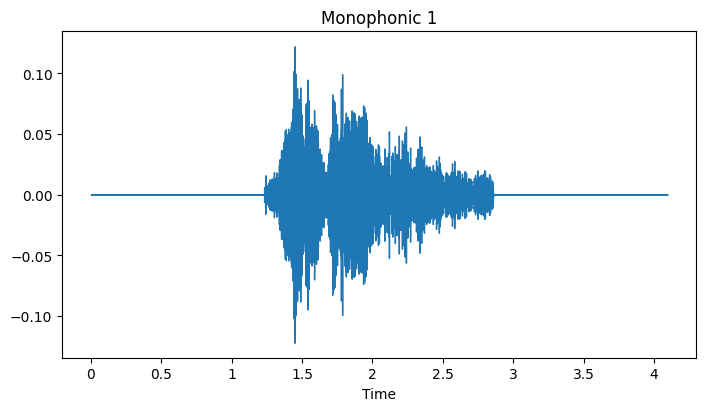

In [ ]:
# plot selected audio
visualize_audio(test_audio, is_monphonic=True)


In [ ]:
device = next(model.parameters()).device
print(device)

cpu


In [ ]:
reshaped_input = test_audio.reshape(100, 16384)
input_tensor = torch.tensor(reshaped_input)

RuntimeError: ignored

In [ ]:
# Make predictions.
with torch.no_grad():
  predictions = model(test_audio.to(device))

# Print the predictions.
print(predictions)

RuntimeError: ignored

# **CycleGAN**

In [ ]:
!conda run -n myenv python

from params import train_A_dir, train_B_dir
import train

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
!conda run -n myenv python

data_A_norm,data_B_norm = train.prepare_data(train_A_dir,train_B_dir)

Preprocessing Data...


World Encode Data:   0% ETA:  --:--:--                                         

Train data A: 1303 loaded
Train data B: 1523 loaded



World Encode Data: 100% Time:  0:23:22                                         
World Encode Data: 100% Time:  0:26:06                                         


Log Pitch A
Mean: 4.982039, Std: 0.329123
Log Pitch B
Mean: 5.253433, Std: 0.428523
Input data fixed.
Preprocessing Done.
Time Elapsed for Data Preprocessing: 00:50:40


In [ ]:
!conda run -n myenv python

train.train(data_A_norm,data_B_norm,0)

TypeError: ignored

In [ ]:
!conda run -n myenv python

import model

model.CycleGAN(num_features=24)

TypeError: ignored